In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!pip install opendatasets

In [ ]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt

In [ ]:
od.download('https://www.kaggle.com/datasets/salader/dogs-vs-cats')

Skipping, found downloaded files in "./dogs-vs-cats" (use force=True to force download)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/dogs_vs_cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/dogs_vs_cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 103ms/step - loss: 1.2951 - accuracy: 0.5958 - val_loss: 0.5732 - val_accuracy: 0.7142
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5586 - accuracy: 0.7215 - val_loss: 0.5053 - val_accuracy: 0.7510
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4673 - accuracy: 0.7806 - val_loss: 0.4929 - val_accuracy: 0.7652
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3994 - accuracy: 0.8190 - val_loss: 0.4146 - val_accuracy: 0.8072
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.3498 - accuracy: 0.8472 - val_loss: 0.4304 - val_accuracy: 0.8042
Epoch 6/10
625/625 [==============================] - 63s 100ms/step - loss: 0.2769 - accuracy: 0.8778 - val_loss: 0.4849 - val_accuracy: 0.7990
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2169 - accuracy: 0.9100 - val_loss: 0.7844 - val_ac

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dogs-vs-cats/dogs_vs_cats/train/dogs/dog.1.jpg')

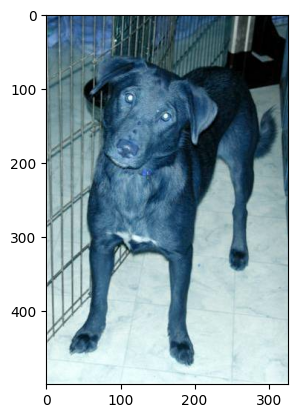

In [ ]:
plt.imshow(test_img)